In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Répartition des ressources

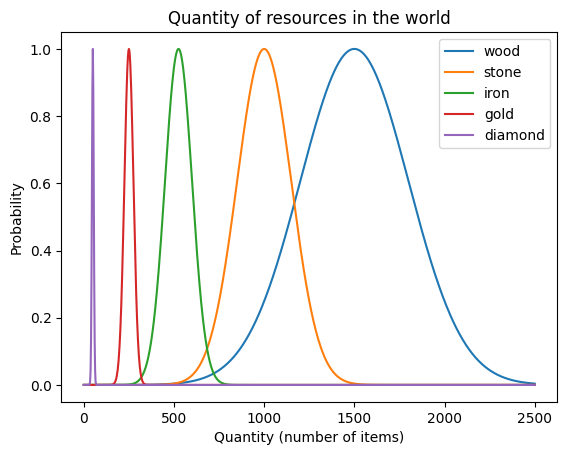

In [3]:
# Showing distribution of resources in the world

def gauss(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

x = np.linspace(0,2500,1000)
plt.plot(x,gauss(x, 1500, 300), label="wood")
plt.plot(x,gauss(x, 1000, 150), label="stone")
plt.plot(x,gauss(x, 525, 75), label="iron")
plt.plot(x,gauss(x, 250, 25), label="gold")
plt.plot(x,gauss(x, 50, 5), label="diamond")
plt.title("Quantity of resources in the world")
plt.xlabel("Quantity (number of items)")
plt.ylabel("Probability")
plt.legend()
x=plt.plot()

In [4]:
#
wood_total_quantity = 1500
stone_total_quantity = 1000
iron_total_quantity = 525
gold_total_quantity = 250
diamond_total_quantity = 50

# wood_total_quantity = int(np.random.normal(1500,300))
# stone_total_quantity = int(np.random.normal(1000,150))
# iron_total_quantity = int(np.random.normal(525,75))
# gold_total_quantity = int(np.random.normal(250,25))
# diamond_total_quantity = int(np.random.normal(50,5))

total_quantity = wood_total_quantity + stone_total_quantity + iron_total_quantity + gold_total_quantity + diamond_total_quantity

wood_quantity_percentage = wood_total_quantity / total_quantity
stone_quantity_percentage = stone_total_quantity / total_quantity
iron_quantity_percentage = iron_total_quantity / total_quantity
gold_quantity_percentage = gold_total_quantity / total_quantity
diamond_quantity_percentage = diamond_total_quantity / total_quantity

start_money = 5000 # crédits
buy_power = 500 # items avec les crédits initiaux

wood_price = start_money / buy_power / wood_quantity_percentage
stone_price = start_money / buy_power / stone_quantity_percentage
iron_price = start_money / buy_power / iron_quantity_percentage
gold_price = start_money / buy_power / gold_quantity_percentage
diamond_price = start_money / buy_power / diamond_quantity_percentage

# wood_price = np.random.normal(wood_price, 0.1*wood_price)
# stone_price = np.random.normal(stone_price, 0.1*stone_price)
# iron_price = np.random.normal(iron_price, 0.1*iron_price)
# gold_price = np.random.normal(gold_price, 0.1*gold_price)
# diamond_price = np.random.normal(diamond_price, 0.1*diamond_price)

print(f"""\
Total ressources
    wood:    {wood_total_quantity} items | average price: {wood_price:.2f} credits/item | {1-wood_quantity_percentage:.2f} of total
    stone:   {stone_total_quantity} items | average price: {stone_price:.2f} credits/item | {1-stone_quantity_percentage:.2f} of total
    iron:    {iron_total_quantity} items | average price: {iron_price:.2f} credits/item | {1-iron_quantity_percentage:.2f} of total
    gold:    {gold_total_quantity} items | average price: {gold_price:.2f} credits/item | {1-gold_quantity_percentage:.2f} of total
    diamond: {diamond_total_quantity} items | average price: {diamond_price:.2f} credits/item | {1-diamond_quantity_percentage:.2f} of total
""")

Total ressources
    wood:    1500 items | average price: 22.17 credits/item | 0.55 of total
    stone:   1000 items | average price: 33.25 credits/item | 0.70 of total
    iron:    525 items | average price: 63.33 credits/item | 0.84 of total
    gold:    250 items | average price: 133.00 credits/item | 0.92 of total
    diamond: 50 items | average price: 665.00 credits/item | 0.98 of total



In [5]:
#

class Actor:
    def __init__(self, name:str):
        self.name = name
        self.wood_quantity = np.random.randint(100,200)
        self.stone_quantity = np.random.randint(50,150)
        self.iron_quantity = np.random.randint(25,75)
        self.gold_quantity = np.random.randint(10,20)
        self.diamond_quantity = np.random.randint(0,5)

def get_price(quantity, average_quantity, average_price, random=True):
    price = average_price * (1 - 0.5*(quantity - average_quantity) / average_quantity)
    price = max(0.5 * average_price, price)
    price = min(1.5 * average_price, price)
    if random: price = np.random.normal(price, 0.1*price)
    return price

class Villager(Actor):
    def __init__(self, name:str):
        super().__init__(name)
        self.wood_price = 0
        self.stone_price = 0
        self.iron_price = 0
        self.gold_price = 0
        self.diamond_price = 0

villagers = [Villager("Villager "+str(i)) for i in range(10)]

remaining_wood = wood_total_quantity
remaining_stone = stone_total_quantity
remaining_iron = iron_total_quantity
remaining_gold = gold_total_quantity
remaining_diamond = diamond_total_quantity

for villager in villagers[:-1]:
    #  * 
    villager.wood_quantity = min(int(np.random.rand()*2 * wood_total_quantity / len(villagers)), remaining_wood)
    villager.stone_quantity = min(int(np.random.rand()*2 * stone_total_quantity / len(villagers)), remaining_stone)
    villager.iron_quantity = min(int(np.random.rand()*2 * iron_total_quantity / len(villagers)), remaining_iron)
    villager.gold_quantity = min(int(np.random.rand()*2 * gold_total_quantity / len(villagers)), remaining_gold)
    villager.diamond_quantity = min(int(np.random.rand()*2 * diamond_total_quantity / len(villagers)), remaining_diamond)
    remaining_wood -= villager.wood_quantity
    remaining_stone -= villager.stone_quantity
    remaining_iron -= villager.iron_quantity
    remaining_gold -= villager.gold_quantity
    remaining_diamond -= villager.diamond_quantity
    villager.wood_price = get_price(villager.wood_quantity, wood_total_quantity / len(villagers), wood_price)
    villager.stone_price = get_price(villager.stone_quantity, stone_total_quantity / len(villagers), stone_price)
    villager.iron_price = get_price(villager.iron_quantity, iron_total_quantity / len(villagers), iron_price)
    villager.gold_price = get_price(villager.gold_quantity, gold_total_quantity / len(villagers), gold_price)
    villager.diamond_price = get_price(villager.diamond_quantity, diamond_total_quantity / len(villagers), diamond_price)

    print(f"""\
{villager.name}:
    wood:    {villager.wood_quantity} items | price: {villager.wood_price:.2f} credits/item
    stone:   {villager.stone_quantity} items | price: {villager.stone_price:.2f} credits/item
    iron:    {villager.iron_quantity} items | price: {villager.iron_price:.2f} credits/item
    gold:    {villager.gold_quantity} items | price: {villager.gold_price:.2f} credits/item
    diamond: {villager.diamond_quantity} items | price: {villager.diamond_price:.2f} credits/item
""")
    
villagers[-1].wood_quantity = remaining_wood
villagers[-1].stone_quantity = remaining_stone
villagers[-1].iron_quantity = remaining_iron
villagers[-1].gold_quantity = remaining_gold
villagers[-1].diamond_quantity = remaining_diamond

print(f"""\
{villagers[-1].name}:
    wood:    {villagers[-1].wood_quantity} items | price: {villagers[-1].wood_price:.2f} credits/item
    stone:   {villagers[-1].stone_quantity} items | price: {villagers[-1].stone_price:.2f} credits/item
    iron:    {villagers[-1].iron_quantity} items | price: {villagers[-1].iron_price:.2f} credits/item
    gold:    {villagers[-1].gold_quantity} items | price: {villagers[-1].gold_price:.2f} credits/item
    diamond: {villagers[-1].diamond_quantity} items | price: {villagers[-1].diamond_price:.2f} credits/item
""")

Villager 0:
    wood:    12 items | price: 29.79 credits/item
    stone:   50 items | price: 38.77 credits/item
    iron:    54 items | price: 62.22 credits/item
    gold:    17 items | price: 178.82 credits/item
    diamond: 0 items | price: 816.45 credits/item

Villager 1:
    wood:    24 items | price: 27.05 credits/item
    stone:   159 items | price: 26.63 credits/item
    iron:    73 items | price: 48.92 credits/item
    gold:    14 items | price: 184.56 credits/item
    diamond: 2 items | price: 955.45 credits/item

Villager 2:
    wood:    266 items | price: 12.75 credits/item
    stone:   129 items | price: 22.19 credits/item
    iron:    1 items | price: 92.27 credits/item
    gold:    18 items | price: 157.02 credits/item
    diamond: 0 items | price: 905.36 credits/item

Villager 3:
    wood:    180 items | price: 23.57 credits/item
    stone:   117 items | price: 31.07 credits/item
    iron:    36 items | price: 85.30 credits/item
    gold:    6 items | price: 185.24 credi

(0.0, 2.5)

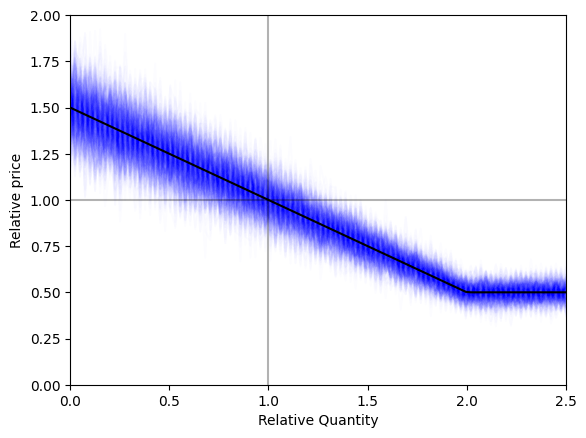

In [6]:
x = np.linspace(0,2.5,100)
for _ in range(500):
    p = []
    for v in x:
        p.append(get_price(v,1,1))    
    plt.plot(x,p,c="b",alpha=0.01)

p = []
for v in x:
    p.append(get_price(v,1,1,False))    
plt.plot(x,p,c="k",)

plt.plot(x,x*0+1,c="k",alpha=0.3)
plt.axvline(1,c="k",alpha=0.3)
plt.xlabel("Relative Quantity")
plt.ylabel("Relative price")
plt.ylim(0,2)
plt.xlim(0,2.5)

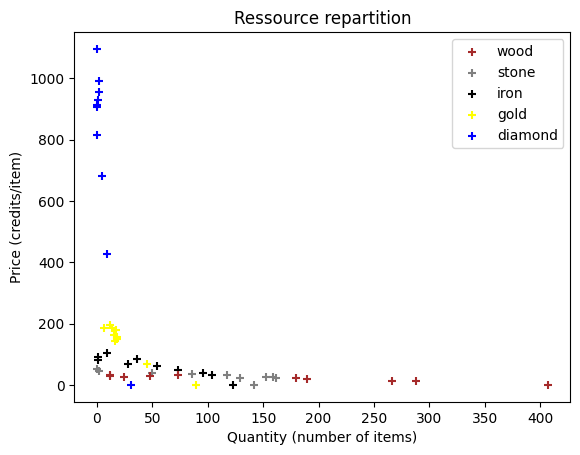

In [7]:
for villager in villagers:
    plt.scatter(villager.wood_quantity, villager.wood_price, color="brown", marker="+")
    plt.scatter(villager.stone_quantity, villager.stone_price, color="grey", marker="+")
    plt.scatter(villager.iron_quantity, villager.iron_price, color="black", marker="+")
    plt.scatter(villager.gold_quantity, villager.gold_price, color="yellow", marker="+")
    plt.scatter(villager.diamond_quantity, villager.diamond_price, color="blue", marker="+")

plt.title("Ressource repartition")
plt.xlabel("Quantity (number of items)")
plt.ylabel("Price (credits/item)")
plt.legend(["wood","stone","iron","gold","diamond"])
plt.show()

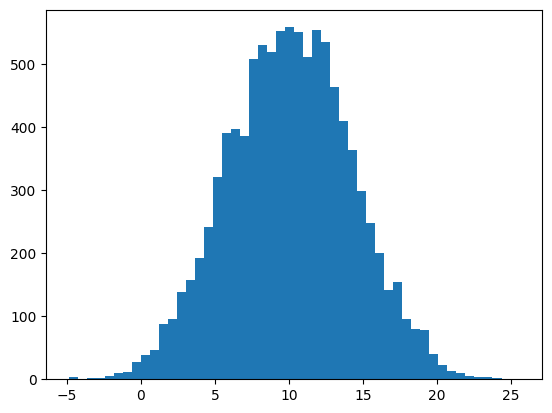

In [8]:
m = 10
s = 5

def random_normal(m,s):
    x = m
    delta = s
    for _ in range(5):
        dx = (np.random.rand()*2-1) * delta
        new_x = x + dx

        if np.random.rand() < gauss(new_x, m, s) / gauss(x, m, s):
            x = new_x

    return x

hist = []
for _ in range(10000):
    hist.append(random_normal(m,s))

hist = np.array(hist)
plt.hist(hist, bins=50)
plt.show()

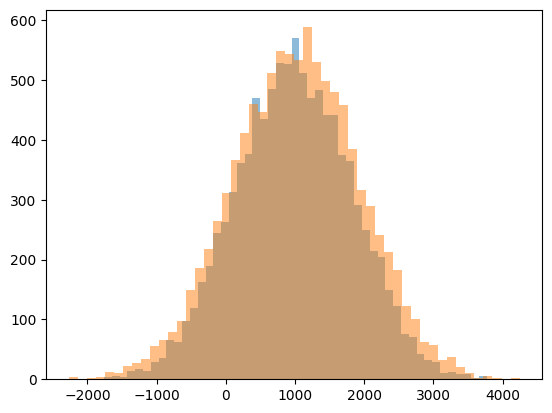

In [16]:
mean = 1000
std = 1000

def random_normal_2(mean,std,N=10):
    x = 0
    for _ in range(N):
        x += (np.random.rand()-0.5)/N
    x = x * std*N + mean
    return x

hist = []
hist2 = []
for _ in range(10000):
    hist.append(random_normal(mean,std))
    hist2.append(random_normal_2(mean,std))

hist = np.array(hist)
plt.hist(hist, bins=50, alpha=0.5)
plt.hist(hist2, bins=50, alpha=0.5)
plt.show()